In [15]:
import sys
import os

import pandas as pd
import numpy as np

In [16]:
load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
autoreload 2

This library is being developed for the purpose of this work

In [18]:
from phm08ds.data import load_data

The dataset is comes with the package. To load it, just call the following.

In [19]:
data = load_data.load(type='train')
data.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,...,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


### What represents each one of columns in this dataset?

- Column 0: engine unit or even the aircraft number
- Column 1: time step
- Column 2, 3 and 4: operational condition. See readme of dataset for futher details.
- Colum 5 to 26: sensor readings

## Let's take a look how the data looks like

In [20]:
from phm08ds.data.preprocessing import Data_per_unit
from phm08ds.data.preprocessing import Data_per_sensor

tf_unit_1 = Data_per_unit(unit=1)
unit_1 = tf_unit_1.fit_transform(data)

unit_1.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,...,Sensor_11,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,372.15,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,521.81,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,183.26,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,314.84,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,130.44,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025


In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sns.set_style("whitegrid")
sns.set_context("notebook")

### The data is a multivariate timeseries

In [22]:
def plot_series(unit, sensor):
    tf_data_unit = Data_per_unit(unit=unit)
    tf_data_sensor = Data_per_sensor(sensor=sensor)
    
    data_unit = tf_data_unit.fit_transform(data)
    data_unit_sensor = tf_data_sensor.fit_transform(data_unit)  
    plt.figure(figsize=(30*0.39, 10*0.39))
    plt.plot(data_unit_sensor.iloc[:,-1])
    
interact(plot_series, unit=(1,100,1), sensor=(1,20,1))

interactive(children=(IntSlider(value=50, description='unit', min=1), IntSlider(value=10, description='sensor'…

<function __main__.plot_series(unit, sensor)>

### Defining Health States for the data, i.e. classes

According to Tamilselvan (2013): "The sensory signals of each engine unit is first arranged in descending order based on the operation cycle index and the first 50 data points are termed as HS 4 (failure HS); the region between 75 and 125 data points is termed as HS 3; the region between 150 and 200 data points is termed as HS 2; and the region greater than 220 data points is termed as HS 1 (healthy HS).”

Before, lable date, I am curious if all time series, form units or sensors, have the same number os points. Let's take a look into it.

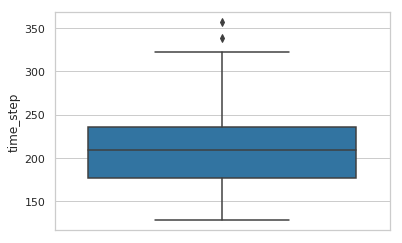

In [23]:
ax = sns.boxplot(y=data.groupby(by='unit')['time_step'].count(),orient="v")

It varies according to the Figure above. 25% of all engines have been degrated before 180 time steps. The experimental scenarios is reported " Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition.". So, the variation is due to its initial start condition.

In [24]:
from phm08ds.data.preprocessing import HealthState

tf_set_health_state = HealthState()

data_with_hs = tf_set_health_state.fit_transform(data)

In [25]:
data_with_hs.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,...,Sensor_12,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Health_state
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,2388.13,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,1
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,2388.15,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,1
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,2387.95,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,1
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,2388.07,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,1
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,2387.89,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,1


In [26]:
def plot_series(unit, sensor):
    data_unit_sensor_buffer = data_with_hs.loc[data['unit'] == unit,:]
    
    plt.figure(figsize=(30*0.39, 10*0.39))    
    sns.lineplot(x='time_step', y='Sensor_' + str(sensor), data=data_unit_sensor_buffer, hue='Health_state', palette='Wistia')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
interact(plot_series, unit=(1,100,1), sensor=(1,20,1))

interactive(children=(IntSlider(value=50, description='unit', min=1), IntSlider(value=10, description='sensor'…

<function __main__.plot_series(unit, sensor)>

# Grouping data by operational conditions

According to Wang, 2008 the three operational conditions could be clustered into 6 groups like that

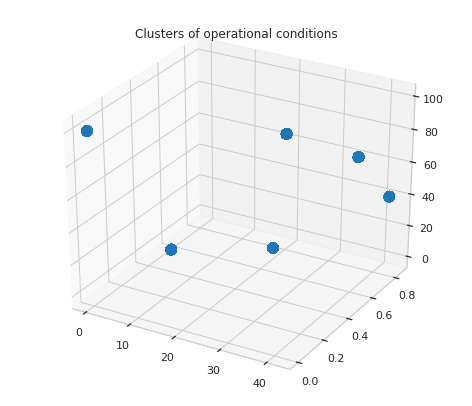

In [28]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['operational_setting_1'], data['operational_setting_2'], data['operational_setting_3'], s=100)
plt.title('Clusters of operational conditions')
plt.show()

To find the cluster centers automatically we are going to use kmeans. Just for convinience.

That is the operational condition for each sample given by kmeans.

In [37]:
from phm08ds.data.preprocessing import OperationalCondition

tf_set_op_cond = OperationalCondition().fit(data_with_hs)
op_cond = tf_set_op_cond.transform(data_with_hs)
op_cond

array([2, 3, 1, ..., 4, 1, 5], dtype=int32)

In [38]:
data_with_op_cond = data_with_hs.copy()
data_with_op_cond['Operational_condition'] = op_cond
data_with_op_cond.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Health_state,Operational_condition
0,1,1,10.0047,0.2501,20.0,489.05,604.13,1499.45,1309.95,10.52,...,8120.83,8.6216,0.03,368,2319,100.0,28.58,17.1735,1,2
1,1,2,0.0015,0.0003,100.0,518.67,642.13,1584.55,1403.96,14.62,...,8132.87,8.3907,0.03,391,2388,100.0,38.99,23.3619,1,3
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,1,1
3,1,4,20.0031,0.7005,0.0,491.19,607.03,1488.44,1249.18,9.35,...,8052.30,9.2231,0.02,364,2324,100.0,24.42,14.7832,1,6
4,1,5,42.0041,0.8405,40.0,445.00,549.52,1354.48,1124.32,3.91,...,8083.67,9.2986,0.02,330,2212,100.0,10.99,6.4025,1,4


In [39]:
from phm08ds.data.preprocessing import Data_per_op_cond

tf_data_op_1 = Data_per_op_cond(operational_condition=1)
data_op_1 = tf_data_op_1.fit_transform(data_with_op_cond)
data_op_1.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_0,Sensor_1,Sensor_2,Sensor_3,Sensor_4,...,Sensor_13,Sensor_14,Sensor_15,Sensor_16,Sensor_17,Sensor_18,Sensor_19,Sensor_20,Health_state,Operational_condition
2,1,3,34.9986,0.8401,60.0,449.44,555.42,1368.17,1122.49,5.48,...,8063.84,9.3557,0.02,334,2223,100.0,14.83,8.8555,1,1
11,1,12,35.0029,0.8413,60.0,449.44,555.85,1360.54,1130.69,5.48,...,8063.79,9.2878,0.02,335,2223,100.0,14.69,8.7988,1,1
23,1,24,34.9987,0.8400,60.0,449.44,555.19,1359.28,1131.95,5.48,...,8063.93,9.3254,0.02,334,2223,100.0,14.96,8.8405,2,1
38,1,39,35.0010,0.8400,60.0,449.44,555.85,1370.11,1126.43,5.48,...,8065.11,9.3512,0.02,333,2223,100.0,15.00,8.7529,2,1
40,1,41,35.0018,0.8400,60.0,449.44,555.30,1359.77,1129.48,5.48,...,8065.92,9.2991,0.02,334,2223,100.0,14.79,9.0533,2,1


### That raises a questions: How the data from one unit and one sensor looks like clustered by one operational condition?

Let's choose the sensor 19 from unit 100, for instance.

In [42]:
data_buffer = Data_per_sensor(sensor=19).fit_transform((Data_per_unit(unit=100).fit_transform(data)))
data_buffer.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_19
20925,100,1,0.0004,0.0019,100.0,38.99
20926,100,2,20.0061,0.7000,0.0,24.72
20927,100,3,10.0038,0.2500,20.0,28.56
20928,100,4,0.0013,0.0000,100.0,39.10
20929,100,5,10.0056,0.2500,20.0,28.64


In [43]:
op_cond = tf_set_op_cond.transform(data_buffer)
data_buffer.insert(data_buffer.shape[-1], 'Operational_condition', op_cond)
data_buffer.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_19,Operational_condition
20925,100,1,0.0004,0.0019,100.0,38.99,3
20926,100,2,20.0061,0.7000,0.0,24.72,6
20927,100,3,10.0038,0.2500,20.0,28.56,2
20928,100,4,0.0013,0.0000,100.0,39.10,3
20929,100,5,10.0056,0.2500,20.0,28.64,2


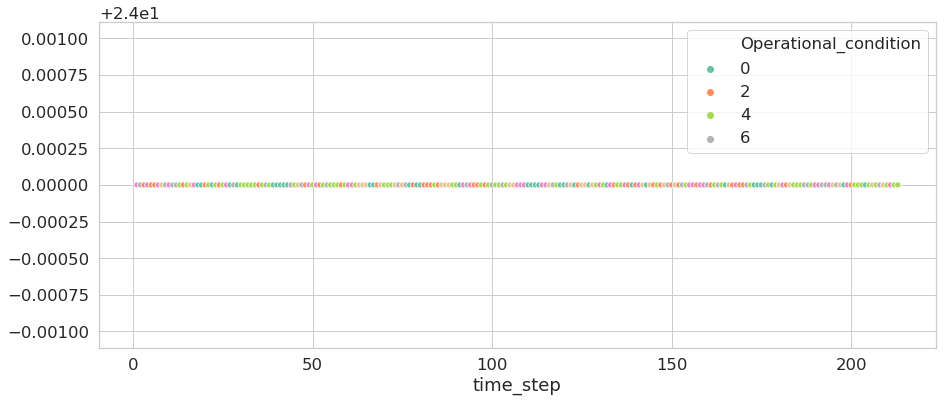

In [44]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

fig = plt.figure(figsize=(15,6))
ax = sns.scatterplot('time_step', 24, data=data_buffer, hue='Operational_condition', palette='Set2')
# ax = sns.lineplot(x='time_step', y=24, data=data_buffer)

### Feature selection, i.e. sensors

According to Wang (2008): "In the following procedures of this work, the seven sensors, 2, 3, 4, 7, 11, 12 and 15, are used.".

In [45]:
def plot_series(op_cond, sensor):
    data_unit_sensor_buffer = Data_per_op_cond(operational_condition=op_cond).fit_transform(data_with_op_cond)
    
    plt.figure(figsize=(7, 4))    
    sns.scatterplot(x='time_step', y='Sensor_' + str(sensor), data=data_unit_sensor_buffer, hue='Health_state', palette='Wistia')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
interact(plot_series, op_cond=[1,2,3,4,5,6], sensor=(1,20,1))

interactive(children=(Dropdown(description='op_cond', options=(1, 2, 3, 4, 5, 6), value=1), IntSlider(value=10…

<function __main__.plot_series(op_cond, sensor)>

In [46]:
from phm08ds.features.feature_selection import SelectSensors

data_selected_sensors = SelectSensors().fit_transform(data_with_op_cond)
data_selected_sensors.head()

,unit,time_step,operational_setting_1,operational_setting_2,operational_setting_3,Sensor_2,Sensor_3,Sensor_4,Sensor_7,Sensor_11,Sensor_12,Sensor_15,Operational_condition,Health_state
0,1,1,10.0047,0.2501,20.0,1499.45,1309.95,10.52,2318.87,372.15,2388.13,0.03,2,1
1,1,2,0.0015,0.0003,100.0,1584.55,1403.96,14.62,2388.01,521.81,2388.15,0.03,3,1
2,1,3,34.9986,0.8401,60.0,1368.17,1122.49,5.48,2222.86,183.26,2387.95,0.02,1,1
3,1,4,20.0031,0.7005,0.0,1488.44,1249.18,9.35,2323.85,314.84,2388.07,0.02,6,1
4,1,5,42.0041,0.8405,40.0,1354.48,1124.32,3.91,2211.80,130.44,2387.89,0.02,4,1


# Save dataset:

Create the transformers

In [50]:
tf_data_op_1 = Data_per_op_cond(operational_condition=1)
tf_data_op_2 = Data_per_op_cond(operational_condition=2)
tf_data_op_3 = Data_per_op_cond(operational_condition=3)
tf_data_op_4 = Data_per_op_cond(operational_condition=4)
tf_data_op_5 = Data_per_op_cond(operational_condition=5)
tf_data_op_6 = Data_per_op_cond(operational_condition=6)

Get data from operational conditions in different dataframes

In [53]:
data_op_1 = tf_data_op_1.fit_transform(data_selected_sensors)
data_op_2 = tf_data_op_2.fit_transform(data_selected_sensors)
data_op_3 = tf_data_op_3.fit_transform(data_selected_sensors)
data_op_4 = tf_data_op_4.fit_transform(data_selected_sensors)
data_op_5 = tf_data_op_5.fit_transform(data_selected_sensors)
data_op_6 = tf_data_op_6.fit_transform(data_selected_sensors)

In [54]:
folderpath = '../data/interim/'
data_op_1.to_csv(folderpath + 'data_op_01.csv', index_label=False)
data_op_2.to_csv(folderpath + 'data_op_02.csv', index_label=False)
data_op_3.to_csv(folderpath + 'data_op_03.csv', index_label=False)
data_op_4.to_csv(folderpath + 'data_op_04.csv', index_label=False)
data_op_5.to_csv(folderpath + 'data_op_05.csv', index_label=False)
data_op_6.to_csv(folderpath + 'data_op_06.csv', index_label=False)